In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [3]:
df = pd.read_csv('./data/supermarket_marketing/Market_Basket_Optimisation.csv', encoding='utf-8', header=None)

In [5]:
txns = df.values.reshape(-1).tolist()

df_list = pd.DataFrame(txns)
df_list['Count']=1

df_list = df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True)
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum())
df_list=df_list.rename(columns={0 : 'Item'})
df_list

,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000238
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041889
43,french fries,1282,0.043660
100,spaghetti,1306,0.044478
37,eggs,1348,0.045908


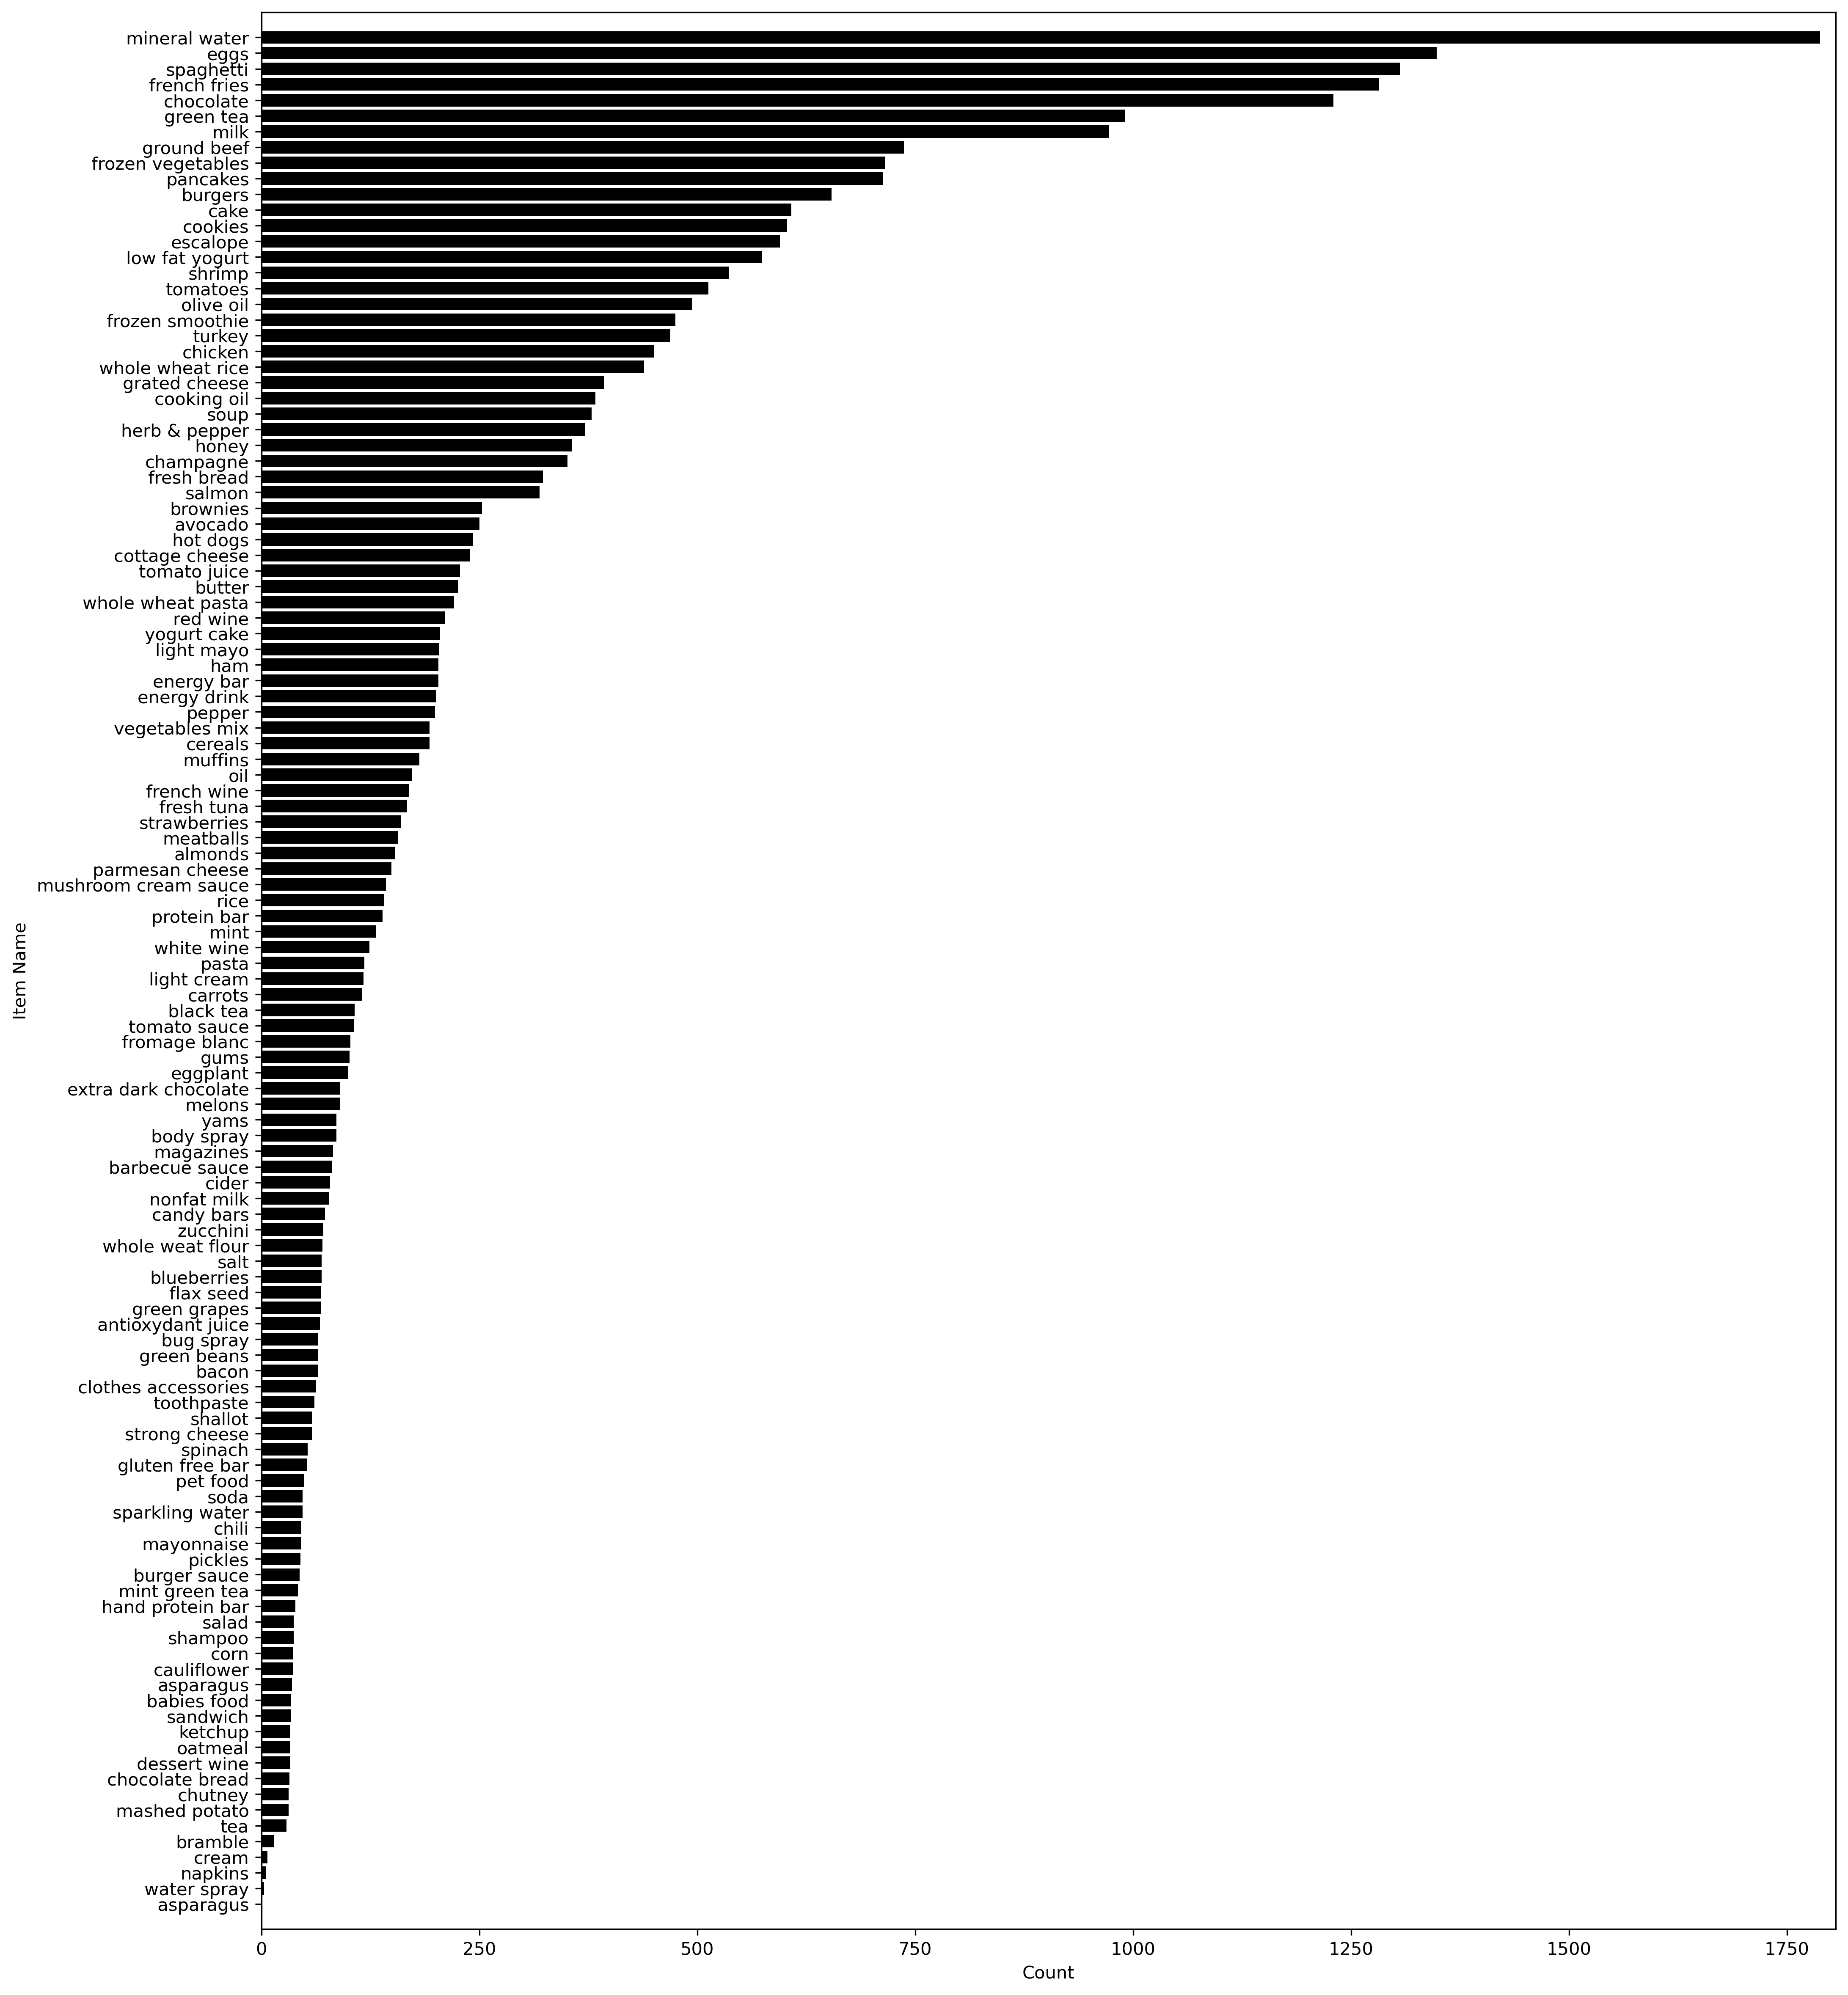

In [8]:
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'],color='black', height=0.8)
plt.margins(0.01)
plt.show()

In [9]:
txns2 = df.stack().groupby(level=0).apply(list).tolist()

In [11]:
itemsets, rules = apriori(txns2, min_support=0.03,min_confidence=0.2, verbosity = 1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [13]:
itemsets

{1: {('honey',): 356,
  ('green tea',): 991,
  ('olive oil',): 494,
  ('tomato juice',): 228,
  ('frozen smoothie',): 475,
  ('low fat yogurt',): 574,
  ('salmon',): 319,
  ('mineral water',): 1788,
  ('avocado',): 250,
  ('shrimp',): 536,
  ('cottage cheese',): 239,
  ('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('whole wheat rice',): 439,
  ('milk',): 972,
  ('french fries',): 1282,
  ('soup',): 379,
  ('spaghetti',): 1306,
  ('frozen vegetables',): 715,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('fresh bread',): 323,
  ('ground beef',): 737,
  ('escalope',): 595,
  ('herb & pepper',): 371,
  ('cake',): 608,
  ('hot dogs',): 243,
  ('brownies',): 253,
  ('butter',): 226},
 2: {('green tea', 'mineral water'): 233,
  ('milk', 'mineral water'): 360,
  ('eggs', 'mineral water'): 382,
  ('eggs', 'spaghetti'): 274,
  ('mineral water

In [ ]:
for item in sorted